<a href="https://colab.research.google.com/github/antonionipo/Modelos-de-Classifica-o-com-Python/blob/main/RID196075_Desafio06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 06
Preveja os usuários com alta chance de deixar o seu streaming
Você trabalha em uma plataforma de streaming e a diretoria está preocupada com o alto índice de usuários cancelando as suas assinaturas. Eles acreditam que é possível prever se um usuário tem mais chance de deixar a plataforma antes que isso aconteça, e com base nessa informação tomar ações para reduzir o churn.
Seu objetivo é criar um modelo de classificação capaz de prever se um usuário tem mais chance de cancelar a sua assinatura na plataforma ou não. Para isso, a empresa forneceu uma base de dados em csv contendo dados sobre as contas dos clientes.

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

## Data Understanding
1. Carregue a base de dados;
2. Realize uma descrição estatística dos dados;
3. Verifique os tipos de dados
4. Verifique a quantidade de valores faltantes

In [3]:
df = pd.read_csv('streaming_data.csv')
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [5]:
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [6]:
df.dtypes

,0
Age,float64
Gender,object
Time_on_platform,float64
Devices_connected,float64
Subscription_type,object
Num_streaming_services,float64
Num_active_profiles,int64
Avg_rating,float64
Churned,float64
User_id,object


In [7]:
df.isna().sum()

,0
Age,11277
Gender,14516
Time_on_platform,21420
Devices_connected,25188
Subscription_type,25221
Num_streaming_services,68312
Num_active_profiles,0
Avg_rating,17270
Churned,16736
User_id,0


## Data Preparation
1. Substituir valores “NaN” por 0 Colunas → Time_on_platform, Num_streaming_services, Churned, Avg_rating, Devices_connected
2. Dropar linhas nulas nas colunas Gender, Subscription_type e Age
3. Transformando valores churned 0 e 1 por No e Yes
4. Transformando valores floats em valores inteiros

In [8]:
df[['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']] = df[['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']].fillna(0)

In [9]:
df.dropna(subset=['Gender', 'Subscription_type', 'Age'], inplace=True)

In [10]:
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})

In [11]:
df[['Age', 'Time_on_platform', 'Num_streaming_services', 'Devices_connected']] = df[['Age', 'Time_on_platform', 'Num_streaming_services', 'Devices_connected']].astype(int)

Realizar o pré-processamento das variáveis categóricas com LabelEncoder ou get_dummies.

In [12]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Subscription_type'] = le.fit_transform(df['Subscription_type'])

## Modelagem dos Dados - Regressão Logística
1. Definir variáveis X e y para o modelo
2. Realizar o .fit do modelo
3. Separar em train e test
4. Realizar a modelagem
5. Plotar matrix confusão
6. Printar métricas

In [13]:
X = df.drop(['Churned', 'User_id'], axis=1)
y = df['Churned']

In [14]:
mm = MinMaxScaler()
X = mm.fit_transform(X)
X = pd.DataFrame(X)

Dividir os dados em treino e teste utilizando train_test_split.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
lr = LogisticRegression().fit(X_train, y_train)

In [17]:
lr_pred = lr.predict(X_test)

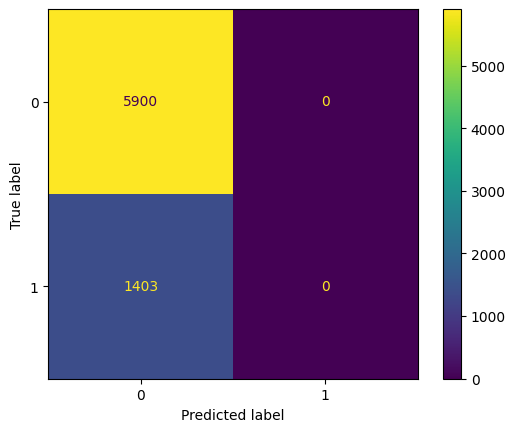

In [18]:
ConfusionMatrixDisplay(confusion_matrix(y_test, lr_pred)).plot()

In [19]:
print(f'Accuracy: {accuracy_score(y_test, lr_pred)}')

Accuracy: 0.8078871696563056


## Modelagem dos Dados - Tunning
1. Realizar o pré-processamento das variáveis categóricas com `LabelEncoder` ou `get_dummies`.
2. Dividir os dados em treino e teste utilizando `train_test_split`.
3. Treinar o modelo com a função `.fit`.
4. Realizar as predições com `.predict`.
5. Adicionar as previsões ao DataFrame original utilizando `.assign`.
6. Avaliar o modelo plotando a matriz de confusão com `ConfusionMatrixDisplay`.

In [20]:
parameters = {
    'penalty': ['l1', 'elasticnet'],
    'C': [0.001, 0.1, 1],
    'solver': ['newton-cg', 'liblinear', 'sag'],
    'max_iter': [100, 200]
}
lr_grid = GridSearchCV(lr, scoring='accuracy', param_grid=parameters, cv=5)

In [21]:
lr_grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 1], 'max_iter': [100, 200],
                         'penalty': ['l1', 'elasticnet'],
                         'solver': ['newton-cg', 'liblinear', 'sag']},
             scoring='accuracy')

In [22]:
lr_tunned = lr_grid.best_params_
lr_tunned

{'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [23]:
lr = LogisticRegression(**lr_tunned).fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [24]:
print(f'Accuracy: {accuracy_score(y_test, lr_pred)}')

Accuracy: 0.8078871696563056


In [25]:
X_test.assign(Churn=y_test).assign(Churn_pred=lr_pred)

,0,1,2,3,4,5,6,7,Churn,Churn_pred
11843,0.490196,1.0,0.706131,0.6,0.0,0.0,0.75,0.000,NaN,No
12678,0.980392,0.0,0.492636,0.6,1.0,0.0,0.75,0.960,NaN,No
35053,0.274510,0.0,0.097500,0.0,0.0,0.0,0.00,0.000,NaN,No
36421,0.411765,0.0,0.812992,0.0,1.0,0.0,0.25,0.000,NaN,No
19202,0.235294,0.0,0.303573,0.8,0.0,0.0,0.75,0.358,NaN,No
...,...,...,...,...,...,...,...,...,...,...
19452,0.176471,1.0,0.000000,0.8,0.5,0.0,1.00,0.570,Yes,No
29606,0.470588,0.0,0.000000,0.0,0.0,0.0,0.50,0.224,NaN,No
35400,0.313725,0.0,0.715493,0.6,1.0,0.0,1.00,0.708,NaN,No
7825,0.941176,1.0,0.000000,0.2,0.0,0.0,0.50,0.562,NaN,No


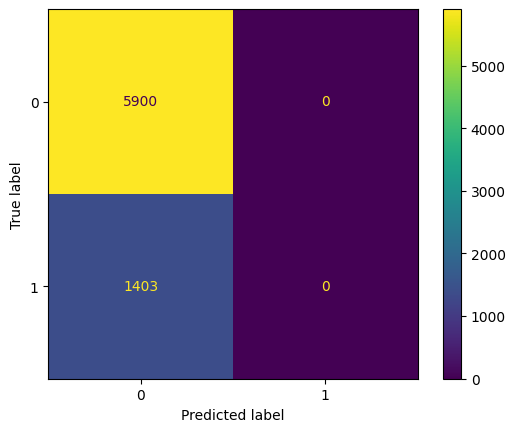

In [26]:
ConfusionMatrixDisplay(confusion_matrix(y_test, lr_pred)).plot()

## Modelagem dos Dados - Random Forest
1. Realizar a montagem do grid search
2. Realizar o .fit do modelo
3. Realizar o Tunning
4. Realizar a modelagem
5. Plotar matrix confusão
6. Printar métricas

In [27]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [28]:
parameters = {
    'n_estimators': [300, 500],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(rf, scoring='accuracy', param_grid=parameters, cv=5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [300, 500]},
             scoring='accuracy')

In [29]:
rf_tunned = rf_grid.best_params_

In [30]:
rf_tunned

{'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 500}

In [31]:
rf = RandomForestClassifier(**rf_tunned).fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [32]:
X_test.assign(Churn=y_test).assign(Churn_pred=rf_pred)

,0,1,2,3,4,5,6,7,Churn,Churn_pred
11843,0.490196,1.0,0.706131,0.6,0.0,0.0,0.75,0.000,NaN,No
12678,0.980392,0.0,0.492636,0.6,1.0,0.0,0.75,0.960,NaN,No
35053,0.274510,0.0,0.097500,0.0,0.0,0.0,0.00,0.000,NaN,No
36421,0.411765,0.0,0.812992,0.0,1.0,0.0,0.25,0.000,NaN,No
19202,0.235294,0.0,0.303573,0.8,0.0,0.0,0.75,0.358,NaN,No
...,...,...,...,...,...,...,...,...,...,...
19452,0.176471,1.0,0.000000,0.8,0.5,0.0,1.00,0.570,Yes,No
29606,0.470588,0.0,0.000000,0.0,0.0,0.0,0.50,0.224,NaN,No
35400,0.313725,0.0,0.715493,0.6,1.0,0.0,1.00,0.708,NaN,No
7825,0.941176,1.0,0.000000,0.2,0.0,0.0,0.50,0.562,NaN,No


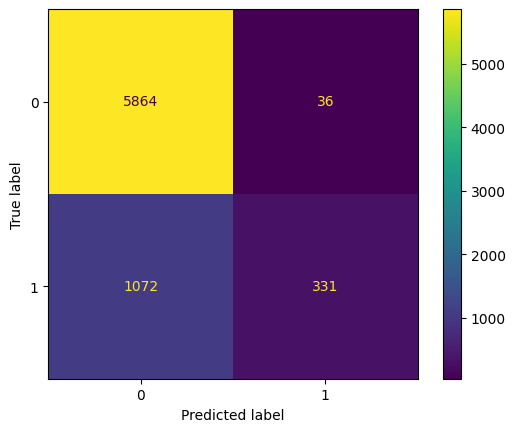

In [33]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_pred)).plot()

In [34]:
print(f'Accuracy: {accuracy_score(y_test, rf_pred)}')

Accuracy: 0.8482815281391209
